In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 


In [35]:
os.chdir('C:\\Users\\ATUL\\Downloads\\Compressed\\Hierarchical_Clustering')

In [36]:
df = pd.read_csv('Mall_Customers.csv')

In [37]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.shape

(200, 5)

In [39]:
len(df.columns)   ## No. of columns

5

In [40]:
len(df.index)   ## No. of rows

200

In [41]:
# Now we split the dataset into X,Y..
# we have requirement only X, means some columns on which we apply clustering

x= df.iloc[:,3:5].values

In [42]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [43]:
# Now we start making Cluster Models...

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i ,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [44]:
wcss

[269981.28,
 181665.82312925172,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25029.25342493588,
 21850.165282585633,
 19634.55462934998]

Text(0, 0.5, 'WCSS')

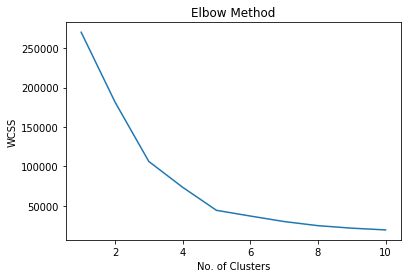

In [47]:
# Now plot the model with wcss and clusters range to find the real number of clusters by Elbow Method

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')


## Clearly seeing  after 5 clusters graph is going linear....So real used clusters are 5...so we take 5 cluster and make new model

In [48]:
# So after confirming elbow method..we make  best fit cluster model for this dataset

kmeans =KMeans(n_clusters=5, init= 'k-means++')

y_kmeans = kmeans.fit_predict(x)

In [49]:
 # this is showing , each customer datas  of whole datasets belongs to which of clusters of 5
    
y_kmeans

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Text(0, 0.5, 'Spending Score')

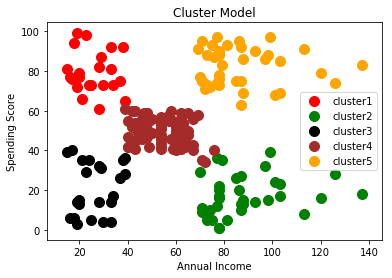

In [58]:
# So now we plot the chart of clusters of groupwise

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='black',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='brown',label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='orange',label='cluster5')
plt.legend()
plt.title('Cluster Model')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

